In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pandas as pd


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
#os.chdir('/Users/lynnsorensen/surfdrive/Arousal_asn_export')

In [3]:
# Figure S2
tracker = joblib.load('Results/tracker_MeanActivations.pkl')
tracker_info = joblib.load('Results/tracker_LayerInfo.pkl')

trainings = 10
sns.set_context('poster')
layers_i = [3, 5, 7, 9, 11, 13, 15, 18]
#layers_i = np.arange(8)

gains = tracker['gains']
num_rands_all = [1.125, 1.25, 1.5,2, 3, 4, 5,6, 8, 10, 20, 30, 40]#[2, 3, 4, 6, 7, 10, 12, 16, 21, 27, 35]
num_rands_all = list(reversed(num_rands_all))
colors = sns.color_palette('magma_r', len(num_rands_all))
#color_idx = [0, 1, 2, 3, -1]
color_idx = [0, 1, 2, 3, 4, 5, -3]
colors_select= [colors[c] for c in color_idx]

num_rands = [1.125, 1.25, 1.5, 2, 3, 4, 20]

df = pd.DataFrame({'Layer':[],
                   'Block':[],
                   'Num_rand':[],
                   'Gain':[],
                   'Training':[],
                   'Activation':[],
                   'Decoding accuracy':[]})
c = 0
for p,l in enumerate(layers_i):
    for n, num_rand in enumerate(num_rands):
        tag = 'random' + str(num_rand)
        for t in range(trainings):
            for i, g in enumerate(tracker['gains']):
                df.loc[c, 'Layer'] = l
                df.loc[c, 'Block'] = p + 1
                df.loc[c, 'Gain'] = g
                df.loc[c, 'Num_rand'] = num_rand
                df.loc[c, 'Training'] = t
                df.loc[c, 'Activation'] = tracker['random' + str(num_rand)]['training_' + str(t)]['means'][p][i]
                df.loc[c, 'Decoding accuracy'] = tracker_info[tag]['training_' + str(t)][l][i]
                c = c+1


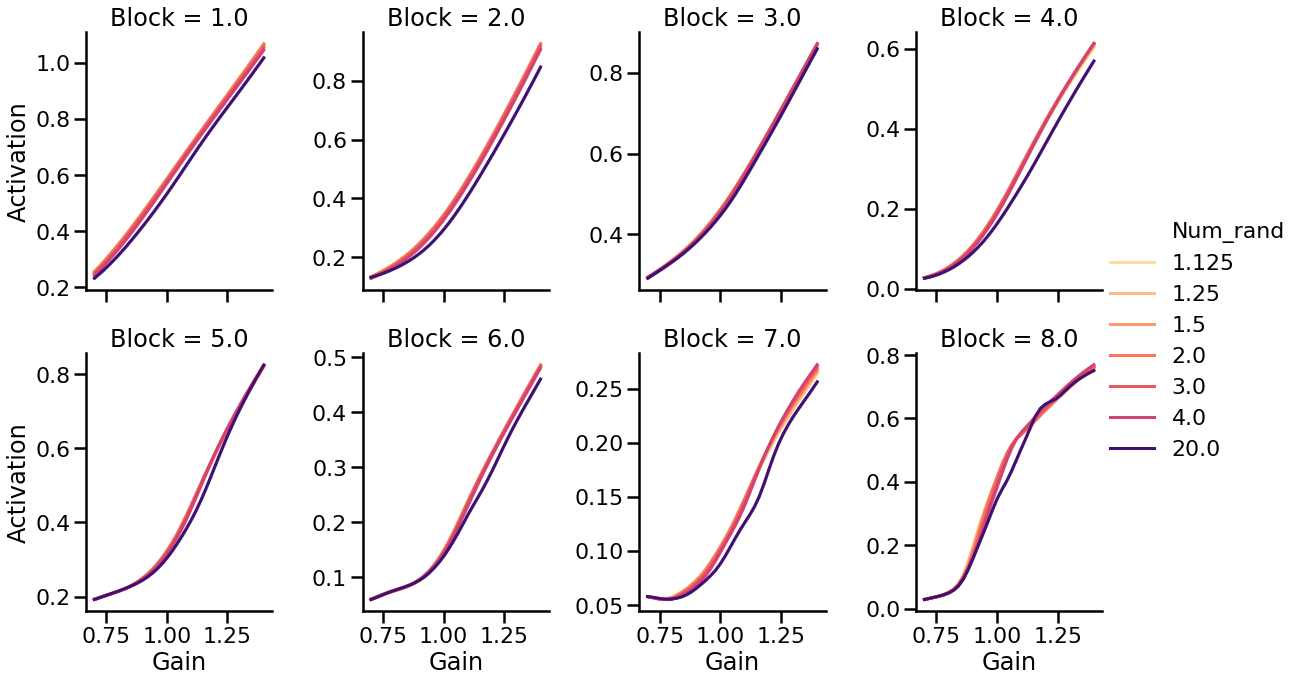

In [4]:
# FigureS2A
ax = sns.relplot(data=df, x='Gain', y='Activation', hue='Num_rand', col='Block', col_wrap=4, palette=colors_select,
                 kind='line', err_kws={'alpha': 0.4},  height=5, aspect=0.8, facet_kws={'sharey':False})
plt.show()

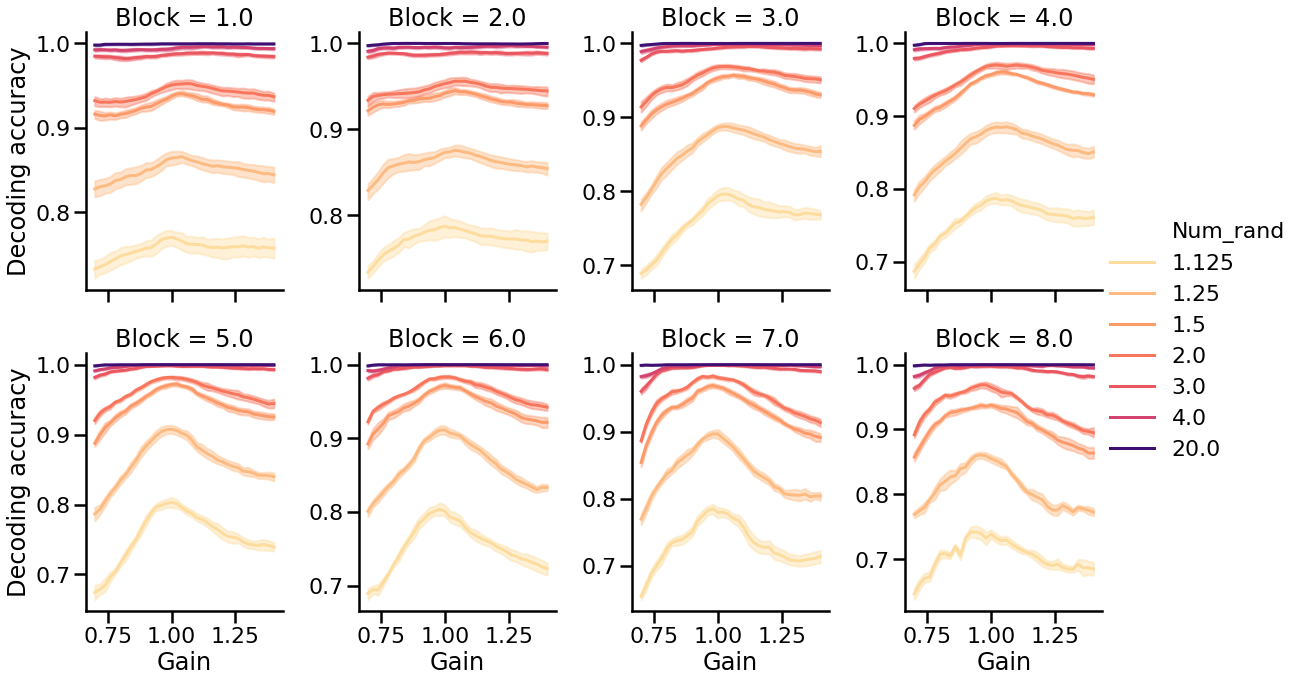

In [5]:
# FigureS2B
ax = sns.relplot(data=df, x='Gain', y='Decoding accuracy', hue='Num_rand', col='Block', col_wrap=4, palette=colors_select,
                 kind='line', err_kws={'alpha': 0.4},  height=5, aspect=0.8, facet_kws={'sharey': False})
plt.show()

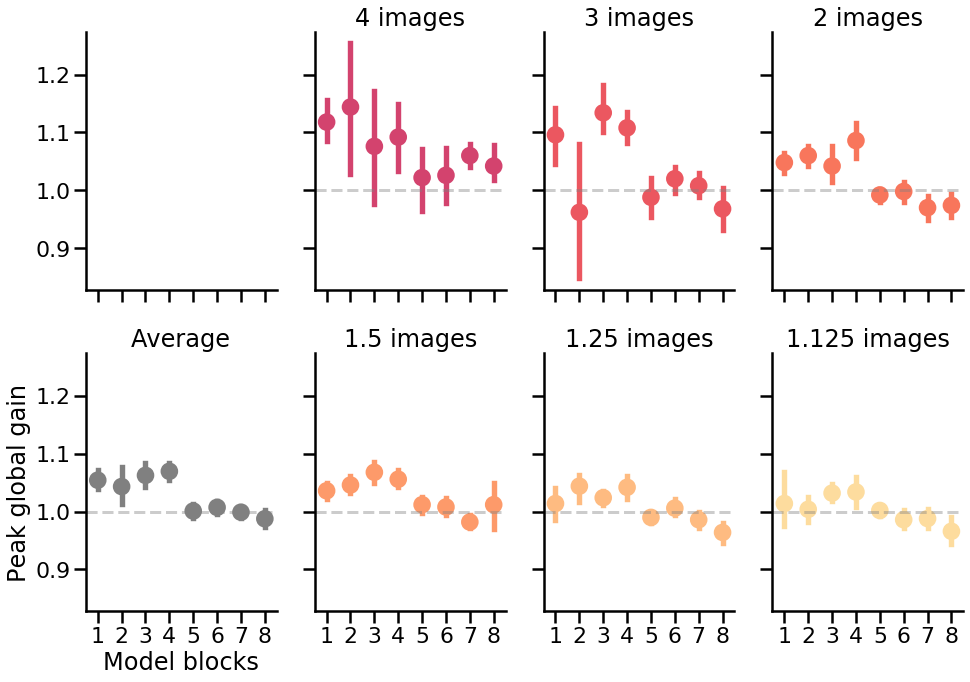

In [6]:
fig, ax = plt.subplots(2, 4, figsize=(14, 10), sharex=True, sharey=True)
ax = ax.flatten()
colors_scatter = [colors[c] for c in color_idx[:-1]]
order = list(reversed(num_rands))
ax_ids = [1,2,3,5,6,7]

for n, num_rand in enumerate(reversed(num_rands[:-1])):
    tag = 'random' + str(num_rand)
    max_gain = []
    cond_gain = []
    for p, l in enumerate(layers_i):
        for i in range(tracker_info['training']):
            max_gain.append(tracker_info['gains'][int(np.median(np.where(tracker_info[tag]['training_' + str(i)][l] == tracker_info[tag]['training_' + str(i)][l].max())[0]))])
            cond_gain.append(p+1)

    sns.pointplot(x=cond_gain, y=max_gain, legend=False, color=colors_scatter[-(n+1)],
                  dodge=True, join=False, ax=ax[ax_ids[n]])

    ax[ax_ids[n]].set_title(str(num_rand) + ' images')
    ax[ax_ids[n]].axhline(1, c='gray', alpha=0.4, ls='--')
    sns.despine()
ax[4].set_ylabel('Peak global gain')
ax[4].set_xlabel('Model blocks')

#Plot the average per block
max_gain_all = []
cond_gain_all = []
for p, l in enumerate(layers_i):
    for n, num_rand in enumerate(reversed(num_rands[:-1])):
        tag = 'random' + str(num_rand)
        for i in range(tracker_info['training']):
            max_gain_all.append(tracker_info['gains'][int(np.median(np.where(tracker_info[tag]['training_' + str(i)][l] == tracker_info[tag]['training_' + str(i)][l].max())[0]))])
            cond_gain_all.append(p+1)

sns.pointplot(x=cond_gain_all, y=max_gain_all, legend=False, color=(0.5, 0.5, 0.5),
                  dodge=True, join=False, ax=ax[4])

ax[4].set_title('Average')
ax[4].axhline(1, c='gray', alpha=0.4, ls='--')

plt.tight_layout()
plt.show()